In [ ]:
%matplotlib inline
from lyft_dataset_sdk.lyftdataset import LyftDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lyft_dataset_sdk.utils.data_classes import LidarPointCloud, Box, Quaternion
from lyft_dataset_sdk.utils.geometry_utils import view_points, transform_matrix
from datetime import datetime


In [ ]:
### Load the dataset
level5data = LyftDataset(data_path='./lyft/', json_path='./lyft/v1.02-train', verbose=True)

### Convert to df
log_df = pd.DataFrame(level5data.log)

scene_df =  pd.DataFrame(level5data.scene)
scene_df = pd.merge(log_df, scene_df, left_on='token', right_on='log_token',how='inner')

sample_df = pd.DataFrame(level5data.sample)


sample_df = pd.merge(scene_df[['log_token', 'date_captured', 'vehicle', 'token_y']],
                     sample_df, left_on='token_y', right_on='scene_token',how='inner')


sampledata_df = pd.DataFrame(level5data.sample_data)
sampledata_df = pd.merge(sample_df[['log_token', 'date_captured', 'token', 'vehicle']],
                         sampledata_df, left_on='token', right_on='sample_token',how='inner')

ego_pose_df = pd.DataFrame(level5data.ego_pose)

calibrated_sensor_df = pd.DataFrame(level5data.calibrated_sensor)
calibrated_sensor_df.rename(columns={
    'token':'calibrated_sensor_token',
    'rotation':'calibrated_sensor_rotation',
    'translation':'calibrated_sensor_translation'    
                                    }, inplace=True)

### Test cars and their corresponding test dates
gb = sampledata_df.groupby(['vehicle','date_captured'])
cardate = []
for key, item in gb:
    cardate.append(key)
    
cardate = pd.DataFrame(cardate,columns = ['veh','date'])

In [ ]:
pivot_df = ego_pose_df.pivot(index ='token', columns ='channel',
                         values = ['translation','rotation',
                                   'calibrated_sensor_translation',
                                   'calibrated_sensor_rotation',
                                   'timestamp','vehicle']).reset_index()

In [290]:
ego_pose_df[ego_pose_df['token']== ego_pose_df['token'].unique()[10]]

,token,ego_pose_token,channel,vehicle,calibrated_sensor_token,rotation,timestamp,translation,calibrated_sensor_rotation,calibrated_sensor_translation
10,038ac634a2efd26f4040441988faa0a25d492046c2f005...,874d3460e83951b1ec9844ba11363516703683abca85be...,CAM_FRONT_RIGHT,a004,8425771fa28032e0523959baf5583b4d4335e8880ad8ca...,"[0.9613544489303992, 0.011134670752948073, -0....",1549045550601613.8,"[2244.1061796853332, 949.5224932458899, -19.40...","[-0.19576201534235493, 0.17892711655025922, -0...","[1.2670040159233806, -0.30826094745483296, 1.6..."
136,038ac634a2efd26f4040441988faa0a25d492046c2f005...,8a3eccfe9cc6e460732e1d56b5175d355dfdc26a4c072f...,LIDAR_TOP,a004,e00c0d3a7645214b96c792dd634aa75f690f7f69336898...,"[0.9614134406647799, 0.011642823343865589, -0....",1549045550601613.8,"[2244.845114044485, 949.0758057924681, -19.406...","[0.0216533352920558, -0.011341736634919929, 0....","[1.1970987448123374, 0.00012574025018907258, 1..."
262,038ac634a2efd26f4040441988faa0a25d492046c2f005...,0bc57b126847119ca807943fc5786c4126d4ade551183c...,CAM_BACK_RIGHT,a004,aac6241dd5e28264de261422696af2037868c5133d9329...,"[0.9613428059842583, 0.011007475426780823, -0....",1549045550601613.8,"[2243.9234637386257, 949.6329559784768, -19.40...","[-0.1670166851178811, 0.1894844865972097, 0.69...","[1.0373408496495098, -0.30649177907426606, 1.6..."
388,038ac634a2efd26f4040441988faa0a25d492046c2f005...,6ae3414eebbaf46ebe594865fed3dce2e909bf4e8eb611...,CAM_BACK,a004,37413c406b975b1932d1c51323c8674f0fc068c1d9b345...,"[0.9613239857288528, 0.01096379163034133, -0.0...",1549045550601613.8,"[2243.7415172736773, 949.738644114325, -19.414...","[-0.487516583306826, 0.5081827325793211, 0.510...","[0.8287643447902846, -0.016411294082713225, 1...."
514,038ac634a2efd26f4040441988faa0a25d492046c2f005...,e3a66a046255b7303d46e91c02072034cd07fb29a81cae...,CAM_FRONT_LEFT,a004,969ed965141baca3dabcaa6f27a54de749839979f9597c...,"[0.961381565367422, 0.011425344261075289, -0.0...",1549045550601613.8,"[2244.471239621207, 949.3018884447943, -19.406...","[0.6830146202888289, -0.6843442413408628, 0.17...","[1.2773102516796049, 0.3116907130375168, 1.682..."
640,038ac634a2efd26f4040441988faa0a25d492046c2f005...,e4504e57f2c718c4aa5a5b047defaee4318021f547baac...,CAM_FRONT_ZOOMED,a004,bb86c8ed87c60936572901c1d8159fcb6f9d46ec7e2ac2...,"[0.9613662550647442, 0.011298950028203329, -0....",1549045550601613.8,"[2244.288939670626, 949.4121036955504, -19.405...","[0.5274959597682902, -0.4769544276334104, 0.47...","[1.5122343146118633, 0.03072946467710018, 1.67..."
766,038ac634a2efd26f4040441988faa0a25d492046c2f005...,48b59ce543b6278c12d97b5a37f23579c7a296b5ebc4bc...,CAM_FRONT,a004,341b8ca622ffbd808a650e1a7ae25defb9d5389868f46c...,"[0.9613663382678114, 0.011300247041571768, -0....",1549045550601613.8,"[2244.290213473489, 949.4113349655605, -19.405...","[0.5087460415840803, -0.5005385578842848, 0.49...","[1.4990888585342461, -0.03169899902821681, 1.6..."
892,038ac634a2efd26f4040441988faa0a25d492046c2f005...,3f075bbe18ba7a05618fed95cb771451890ec50e619798...,CAM_BACK_LEFT,a004,5619064dba67236024b62e741d85dc1603446dd07623b1...,"[0.9613969004751642, 0.01153777011644692, -0.0...",1549045550601613.8,"[2244.6538682344462, 949.191443816951, -19.406...","[-0.6758891921443312, 0.688938518819445, 0.192...","[1.0483678398119496, 0.3072358380981026, 1.689..."


In [3]:
## Rotate transform sensor's coordinates in car frame (using the rotation specs
#of back camera as it is closest to back frame)
## Then position transform the latter in world frame
def sensor_coords_in_world (row, i):
    rot = row.iloc[9];
    return  np.add(row.iloc[1],Quaternion(rot).rotate(row.iloc[i+16] ))

def CarTraj(day,cartype,sampledata_df,ego_pose_df,calibrated_sensor_df):
    
    sampledata_df = sampledata_df[sampledata_df['date_captured'].str.match(day)][
    sampledata_df['vehicle'].str.match(cartype)]
    ego_pose_df = pd.merge(sampledata_df[['token_x','ego_pose_token', 'channel',
                                      'vehicle' ,'calibrated_sensor_token']],
                       ego_pose_df, left_on='ego_pose_token' , right_on='token',how='inner')

    ego_pose_df = ego_pose_df.drop(['token'], axis=1)
    ego_pose_df.rename(columns={'token_x':'token'}, inplace=True)
    ego_pose_df = pd.merge(ego_pose_df, 
                      calibrated_sensor_df[['calibrated_sensor_token', 
                                            'calibrated_sensor_rotation', 
                                            'calibrated_sensor_translation']],
                      left_on='calibrated_sensor_token',
                      right_on='calibrated_sensor_token',
                      how='inner')

    ego_pose_df.sort_values(by=['token'])
    ego_pose_df['timestamp'] = ego_pose_df['timestamp'].astype(str)
    
    ### pivot df includes all trajectory of the selected vehcile in sample df
    pivot_df = ego_pose_df.pivot(index ='token', columns ='channel',
                             values = ['translation','rotation',
                                       'calibrated_sensor_translation',
                                       'calibrated_sensor_rotation',
                                       'timestamp','vehicle']).reset_index()

    pivot_df['timestamps'] = pivot_df['timestamp'].iloc[:,0]
    pivot_df['vehicletype'] = pivot_df['vehicle'].iloc[:,0]
    pivot_df = pivot_df.drop(columns=['timestamp','vehicle'],level=0)
    pivot_df = pivot_df.sort_values(by=['timestamps'])
    pivot_df['timestamps'] = pivot_df['timestamps'].astype(float)/1000000.0
    pivot_df = pivot_df.reset_index(drop=True)
    #LIDAR top
    real_camera_front_coords_2 =  pivot_df.apply(lambda row: sensor_coords_in_world(row,8), axis=1)
    x2_rot = real_camera_front_coords_2.map(lambda t: t[0])
    y2_rot = real_camera_front_coords_2.map(lambda t: t[1])
    ### Trajectoy of Lidar on top for the selected vehicle
    VehTraj = {'x' : x2_rot, 'y' : y2_rot, 'time' : pivot_df['timestamps']}
    VehTraj = pd.DataFrame(data=VehTraj)
    
    return (pivot_df,VehTraj)

In [275]:
    sampledata_df = sampledata_df[sampledata_df['date_captured'].str.match(day)][
    sampledata_df['vehicle'].str.match(cartype)]
    ego_pose_df = pd.merge(sampledata_df[['token_x','ego_pose_token', 'channel',
                                      'vehicle' ,'calibrated_sensor_token']],
                       ego_pose_df, left_on='ego_pose_token' , right_on='token',how='inner')

    ego_pose_df = ego_pose_df.drop(['token'], axis=1)
    ego_pose_df.rename(columns={'token_x':'token'}, inplace=True)
    ego_pose_df = pd.merge(ego_pose_df, 
                      calibrated_sensor_df[['calibrated_sensor_token', 
                                            'calibrated_sensor_rotation', 
                                            'calibrated_sensor_translation']],
                      left_on='calibrated_sensor_token',
                      right_on='calibrated_sensor_token',
                      how='inner')

    ego_pose_df.sort_values(by=['token'])
    ego_pose_df['timestamp'] = ego_pose_df['timestamp'].astype(str)
    
    ### pivot df includes all trajectory of the selected vehcile in sample df
    pivot_df = ego_pose_df.pivot(index ='token', columns ='channel',
                             values = ['translation','rotation',
                                       'calibrated_sensor_translation',
                                       'calibrated_sensor_rotation',
                                       'timestamp','vehicle']).reset_index()

    pivot_df['timestamps'] = pivot_df['timestamp'].iloc[:,0]
    pivot_df['vehicletype'] = pivot_df['vehicle'].iloc[:,0]
    pivot_df = pivot_df.drop(columns=['timestamp','vehicle'],level=0)
    pivot_df = pivot_df.sort_values(by=['timestamps'])
    pivot_df['timestamps'] = pivot_df['timestamps'].astype(float)/1000000.0
    pivot_df = pivot_df.reset_index(drop=True)

/home/arash/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [277]:
pivot_df.iloc[0,:]

                               channel         
token                                              a1d242ea7ed3e7e1ba8606250a0648b77eb7808e54c831...
translation                    CAM_BACK            [1272.685609435103, 1572.157738954184, -24.026...
                               CAM_BACK_LEFT       [1271.7272436105122, 1572.7727591435983, -24.0...
                               CAM_BACK_RIGHT      [1272.4919218147447, 1572.2821085560556, -24.0...
                               CAM_FRONT           [1272.1053944652754, 1572.530002941621, -24.03...
                               CAM_FRONT_LEFT      [1271.9144287006648, 1572.6522435280667, -24.0...
                               CAM_FRONT_RIGHT     [1272.299427489686, 1572.405739665269, -24.031...
                               CAM_FRONT_ZOOMED    [1272.1067378276132, 1572.5291432744289, -24.0...
                               LIDAR_TOP           [1271.5259534335548, 1572.9012178776247, -24.0...
rotation                       CAM_BACK    

In [6]:
#real_camera_front_coords =  pivot_df.apply(lambda row: sensor_coords_in_world(row,4), axis=1)
#x_rot = real_camera_front_coords.map(lambda t: t[0])
#y_rot = real_camera_front_coords.map(lambda t: t[1])


# Camera front left
#real_camera_front_coords_0 =  pivot_df.apply(lambda row: sensor_coords_in_world(row,5), axis=1)
#x0_rot = real_camera_front_coords_0.map(lambda t: t[0])
#y0_rot = real_camera_front_coords_0.map(lambda t: t[1])


# Camera front right
#real_camera_front_coords_1 =  pivot_df.apply(lambda row: sensor_coords_in_world(row,6), axis=1)
#x1_rot = real_camera_front_coords_1.map(lambda t: t[0])
#y1_rot = real_camera_front_coords_1.map(lambda t: t[1])

#Camera Back
#real_camera_front_coords_3 =  pivot_df.apply(lambda row: sensor_coords_in_world(row,1), axis=1)
#x3_rot = real_camera_front_coords_3.map(lambda t: t[0])
#y3_rot = real_camera_front_coords_3.map(lambda t: t[1])



In [7]:
### Extract all pedestrian instances
def extract(str1, str2,token):
    return level5data.get(str2, token)[str1]

In [46]:
PedToken = level5data.category[6]['token']           #token for pedestrian category

PedTraj = {}

Scene = {}

n = -1
for i in range(len(level5data.instance)):
    #check if object in isntance is pedestrian:
    if level5data.instance[i]['category_token']==PedToken:
        n=n+1
        count = level5data.instance[i]['nbr_annotations']
        coordinate = []
        times = []
        hours = []
        minutes = []
        seconds = []
        microseconds = []
        attributes = []
        
        annotation = level5data.instance[i]['first_annotation_token']

        coordinate.append(extract('translation','sample_annotation',annotation)[0:2])
        
        sampletoken = extract('sample_token','sample_annotation',annotation)
        atttoken = extract('attribute_tokens','sample_annotation',annotation)[0]
        scene_token = extract('scene_token','sample',sampletoken)
        logtok = extract('log_token','scene',scene_token)
        veh = extract('vehicle','log',logtok)
        date = extract('date_captured','log',logtok)
        loc = extract('location','log',logtok)
        timestep = extract('timestamp','sample',sampletoken)/1000000.0
        hours.append(datetime.fromtimestamp(timestep).hour)
        minutes.append(datetime.fromtimestamp(timestep).minute)
        seconds.append(datetime.fromtimestamp(timestep).second)
        microseconds.append(datetime.fromtimestamp(timestep).microsecond)
        times.append(timestep)
        attributes.append(extract('name','attribute',atttoken))

        for j in range(1,count):
            annotation = extract('next','sample_annotation',annotation)
            sampletoken = extract('sample_token','sample_annotation',annotation)
            atttoke = extract('attribute_tokens','sample_annotation',annotation)[0]
            coordinate.append(extract('translation','sample_annotation',annotation)[0:2])
            
            timestep = extract('timestamp','sample',sampletoken)/1000000.0
            hours.append(datetime.fromtimestamp(timestep).hour)
            minutes.append(datetime.fromtimestamp(timestep).minute)
            seconds.append(datetime.fromtimestamp(timestep).second)
            microseconds.append(datetime.fromtimestamp(timestep).microsecond)
            times.append(timestep)
            
            attributes.append(extract('name','attribute',atttoke))
            
        PedTraj[n] = pd.DataFrame(coordinate,columns = ['x','y'])
        PedTraj[n]['time'] = times
        PedTraj[n]['hour'] = hours
        PedTraj[n]['minute'] = minutes
        PedTraj[n]['second'] = seconds
        PedTraj[n]['microsecond'] = microseconds
        PedTraj[n]['attributes'] = attributes
        Scene[n] = scene_token
        PedTraj[n]['Loc'] = loc
        PedTraj[n]['Vehicle Type'] = veh
        PedTraj[n]['Date'] = date


In [47]:
#Vehcile side
#PedVehAll = {}
VehTrajAll = {}
for i in range(len(PedTraj)):
    day = PedTraj[i]['Date'][0]
    cartype = PedTraj[i]['Vehicle Type'][0]
    VehTraj = CarTraj(day,cartype,sampledata_df,ego_pose_df,calibrated_sensor_df)[1]
    VehTraj['hour'] = VehTraj.apply(
        lambda row: datetime.fromtimestamp(row['time']).hour, axis=1)
    VehTraj['minute'] = VehTraj.apply(
        lambda row: datetime.fromtimestamp(row['time']).minute, axis=1)
    VehTraj['second'] = VehTraj.apply(
        lambda row: datetime.fromtimestamp(row['time']).second, axis=1)
    VehTraj['microsecond'] = VehTraj.apply(
        lambda row: datetime.fromtimestamp(row['time']).microsecond, axis=1)
    VehTraj['Date'] = day
    
    VehTrajAll[i] =  VehTraj 

/home/arash/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [105]:
### seperate parts of vehtraj that occurs during PedTraj time 
VehPedTrajAll = {}        # part of veh traj during the specified times
for i in range(len(PedTraj)):
    PedStartTime = PedTraj[i]['time'].iloc[0]
    PedEndTime = PedTraj[i]['time'].iloc[-1]
    VehPedTrajAll[i] = VehTrajAll[i][(VehTrajAll[i]['time']>(PedStartTime-60))
                  & (VehTrajAll[i]['time']<(PedEndTime+60))]
    
    
    
    

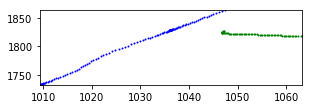

In [272]:

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(538)

instance = 488
xVeh = VehPedTrajAll[instance]['x']
yVeh = VehPedTrajAll[instance]['y']
xPed = PedTraj[instance]['x']
yPed = PedTraj[instance]['y']
Xlim = (min(min(xVeh),min(xPed)), max(max(xPed),max(xVeh)))
Ylim = (min(min(yVeh),min(yPed)), max(max(yPed),max(yVeh)))

ax.set(xlim = Xlim, ylim = Ylim)
ax.scatter(xPed,yPed ,s=1, c='g', label='Pedestrian')

ax.scatter(xVeh,yVeh ,s=1, c='b', label='LIDAR Top')
    
plt.show()

In [213]:
def angel(x,y):
    deltaY = y.iloc[-1]-y.iloc[0]
    deltaX = x.iloc[-1]-x.iloc[0]
    angle = math.atan2(deltaY,deltaX)*180/math.pi
    return angle

def dist(xVeh,yVeh,xPed,yPed):
    
    StartDeltaX = (xVeh.iloc[0]-xPed.iloc[0])**2
    EndDeltaX = (xVeh.iloc[-1]-xPed.iloc[-1])**2
    StartDeltaY = (yVeh.iloc[0]-yPed.iloc[0])**2
    EndDeltaY = (yVeh.iloc[-1]-yPed.iloc[-1])**2
    
    StartDist = np.sqrt(StartDeltaX+StartDeltaY)
    EndDist = np.sqrt (EndDeltaX+EndDeltaY)

    return min(StartDist,EndDist)

In [238]:
Jaywalk = []
for i in range(len(PedTraj)):
    xVeh = VehPedTrajAll[i]['x']
    yVeh = VehPedTrajAll[i]['y']
    xPed = PedTraj[i]['x']
    yPed = PedTraj[i]['y']
    PedAng = angel(xPed,yPed)
    VehAng = angel(xVeh,yVeh)
    DistPed = np.sqrt((xPed.iloc[0] - xPed.iloc[-1])**2 + (yPed.iloc[0] - yPed.iloc[-1])**2)
    if (abs(PedAng-VehAng)>45) and (abs(PedAng-VehAng)<135) and (dist(xVeh,yVeh,xPed,yPed)<50) and DistPed >3:
        Jaywalk.append(i)
      

In [239]:
Jaywalk
    

[17,
 67,
 89,
 92,
 114,
 177,
 183,
 261,
 304,
 331,
 336,
 378,
 393,
 406,
 420,
 423,
 426,
 488,
 538,
 589]

In [274]:
level5data.render_scene(Scene[589])

In [254]:
PedTraj[331]

,x,y,time,hour,minute,second,microsecond,attributes,Loc,Vehicle Type,Date
0,978.666562,1674.570891,1.553288e+09,16,48,5,301075,object_action_walking,Palo Alto,a006,2019-03-22
1,978.737199,1674.901871,1.553288e+09,16,48,5,500950,object_action_walking,Palo Alto,a006,2019-03-22
2,978.808804,1675.233085,1.553288e+09,16,48,5,700510,object_action_walking,Palo Alto,a006,2019-03-22
3,978.880559,1675.563280,1.553288e+09,16,48,5,900062,object_action_walking,Palo Alto,a006,2019-03-22
4,978.951237,1675.894314,1.553288e+09,16,48,6,100161,object_action_walking,Palo Alto,a006,2019-03-22
5,979.049215,1676.301514,1.553288e+09,16,48,6,300773,object_action_walking,Palo Alto,a006,2019-03-22
6,979.154495,1676.706677,1.553288e+09,16,48,6,501327,object_action_walking,Palo Alto,a006,2019-03-22
7,979.284768,1677.096244,1.553288e+09,16,48,6,701433,object_action_walking,Palo Alto,a006,2019-03-22
8,979.406676,1677.496616,1.553288e+09,16,48,6,901164,object_action_walking,Palo Alto,a006,2019-03-22
9,979.529583,1677.897080,1.553288e+09,16,48,7,100868,object_action_walking,Palo Alto,a006,2019-03-22


In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.set(xlim=(400, 4000), ylim=(200, 4000))
instance = 8
for i in (PedVehAll[instance]):
    x = pd.DataFrame(PedTraj[i]).iloc[:,0]
    y = pd.DataFrame(PedTraj[i]).iloc[:,1]
    t = pd.DataFrame(PedTimes[i])
    ax.scatter(x,y ,s=0.1)

ax.scatter(VehTrajAll[instance]['x'], VehTrajAll[instance]['y'],s=1, c='b', label='LIDAR Top')
    
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.axes(projection='3d')
 
instance = 0
for i in (PedVehAll[instance]):
    x = np.array(pd.DataFrame(PedTraj[i]).iloc[:,0])
    x = x.reshape(len(x),)
    y = np.array(pd.DataFrame(PedTraj[i]).iloc[:,1])
    y = y.reshape(len(y),)
    t = np.array(pd.DataFrame(PedTimes[i]))
    t = t.reshape(len(t),)
    ax.plot3D(x, y, t, 'gray')


   

In [ ]:
 


# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [ ]:
zline.shape

In [ ]:
    x = np.array(pd.DataFrame(PedTraj[i]).iloc[:,0])
    x = x.reshape(len(x),)
    y = np.array(pd.DataFrame(PedTraj[i]).iloc[:,1])
    y = y.reshape(len(y),)
    t = np.array(pd.DataFrame(PedTimes[i]))

In [ ]:
x.shape

In [ ]:
t.shape

In [ ]:
0:126
126    

In [ ]:
for i in range(5):
    i = i+126
    plt.plot(VehTraj['time'])

In [ ]:
datetime.fromtimestamp(VehTraj['time'][0]).day

In [ ]:
datetime.fromtimestamp(VehTraj['time'][125])

In [ ]:
level5data.get('attribute', PedAttr[0][20][0])

In [ ]:
instance_tokens = []
for i in range(len(level5data.instance)):
    #check if object in isntance is pedestrian:
    if level5data.instance[i]['category_token']==PedToken:
        print (i)
        


In [ ]:
level5data.render_instance(instance_tokens[0])

In [ ]:
ant=level5data.instance[14]['first_annotation_token']

In [ ]:
sample=level5data.get('sample_annotation',ant)["sample_token"]

In [ ]:
scene_token=level5data.get('sample',sample)['scene_token']

In [ ]:
level5data.render_scene(scene_token)

In [ ]:
for i in range(1,149072):
    x = level5data.ego_pose[i]['timestamp']-level5data.ego_pose[i-1]['timestamp']
    if x<0:
        print (i)

In [ ]:
level5data.ego_pose[2]['timestamp']

In [ ]:
level5data.get('log',level5data.map[0]['log_tokens'][3])